# Pymaceuticals Inc.
---

### Analysis

Background

This dataset from Pymaceuticals, Inc. is of a mouse study of potential treatments for squamous cell carcinoma (SCC) conducted over 45 days observing tumor volume (mm3). The purpose of this study was to compare the performance of Pymaceuticals’ drug of interest, Capomulin, against the other treatment regimens.

Summary

-The supplied Mouse ID and Study Results data is merged and each data point is uniquely identified using "Mouse ID" and
  "Timepoint".

-The 249 unique (Mouse ID,Timepoint) locations queried for duplicates and the 'g989' mouse is found to have duplicated data.     this is removed, leaving 248 unique mice.

-Summary statistical data of Mean Tumor Volume, Median Tumor Volume, Tumor Volume Variance, Tumor Volume Std. Dev. and Tumor     Volume Std. Err. was performed against each Drug Regimen and presented in a table. Section: Summary Statistics

-A male:female ratio of all mice was found to be 51:49. Section: Bar and Pie Charts

Capomulin regimen and comparison with others

-The Capomulin regimen was analysed alongside 3 other treatments: Ramicane, Infubinol, and Ceftamin. This was done by finding the final tumor volume for each regimen and thereafter plotting boxplots of the 4 regimens. The data appeared well distributed except for a single potential outlier on the Infubinol regimen as graphed below. Section: Quartiles, Outliers and Box Plots

-Capomulin and Ramicane appeared to have similarly successful results with the lowest final Tumor Volumes with a mean between     35 and 40. The Infubinol and Ceftamin regimens were not as successful comparatively with a mean Tumor Volume of around 60.

-A section to plot each individual mouse on the Capomulin regimen is available. These can be plotted by choosing one of the 25   Mouse IDs in this section. Section: Line and Scatter Plots

-A strong positive correlation with an r-value = 0.84 was observed in plotting the scatter data of Mouse Weight vs Average       Tumor Volume. Section: Correlation and Regression


Conclusion

-The Capomulin and Ramicane regimen have been shown to have relatively better outcomes as compared with Infubinol and Ceftamin   regimens.

-Mouse weight vs Average tumor volume exhibits a strong positive correlation.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df = pd.merge(study_results,mouse_metadata,on="Mouse ID",how="left")

# Display the data table for preview
combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
combined_df["Mouse ID"].nunique()

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated = combined_df[combined_df.duplicated(['Mouse ID','Timepoint'])]["Mouse ID"].unique()
   
duplicated

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_list = combined_df.loc[combined_df["Mouse ID"] == duplicated[0],:]
loc_index = duplicate_list.index

duplicate_list

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

mouse_df = combined_df.drop(combined_df.index[loc_index])

mouse_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
mouse_df["Mouse ID"].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mouse_groupby = mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"]
tumor_mean = mouse_groupby.mean()
tumor_median = mouse_groupby.median()
tumor_variance = mouse_groupby.var()
tumor_sd = mouse_groupby.std()
tumor_sem = mouse_groupby.sem()

summary_stats_df = pd.DataFrame({
    "Mean Tumor Volume" : tumor_mean,
    "Median Tumor Volume" : tumor_median,
    "Tumor Volume Variance" : tumor_variance,
    "Tumor Volume Std. Dev." : tumor_sd,
    "Tumor Volume Std. Err." : tumor_sem
})

summary_stats_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_agg = mouse_groupby.agg(['mean', 'median','var','std','sem','count'])

summary_agg


,mean,median,var,std,sem,count
Drug Regimen,,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346,230
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821,178
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236,178
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860,188
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466,186
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331,181
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332,148
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955,228
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111,181


## Bar and Pie Charts

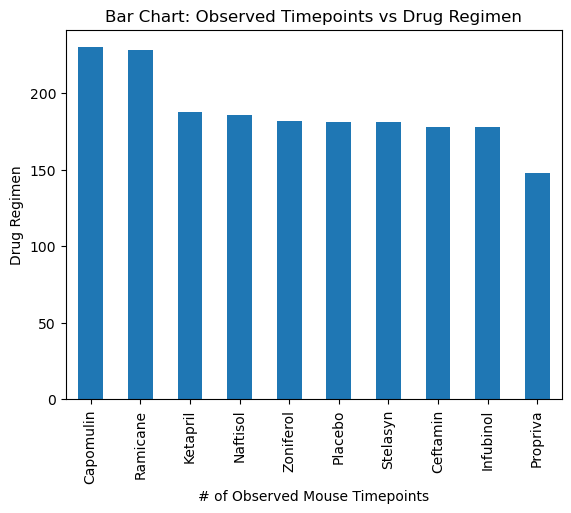

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mouse_groupby.agg('count').sort_values(ascending=False).plot(kind="bar",title="Bar Chart: Observed Timepoints vs Drug Regimen",xlabel="# of Observed Mouse Timepoints",ylabel="Drug Regimen")
plt.show()

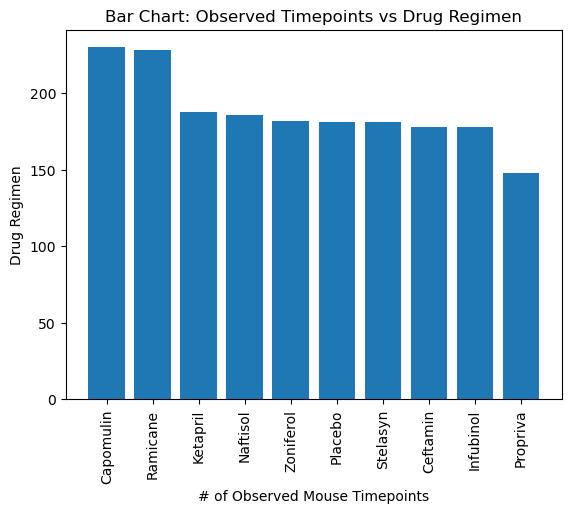

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

plt.bar(mouse_groupby.agg('count').sort_values(ascending=False).index,mouse_groupby.agg('count').sort_values(ascending=False))
plt.xticks(rotation="vertical")
plt.title("Bar Chart: Observed Timepoints vs Drug Regimen")
plt.xlabel("# of Observed Mouse Timepoints")
plt.ylabel("Drug Regimen")
plt.show()

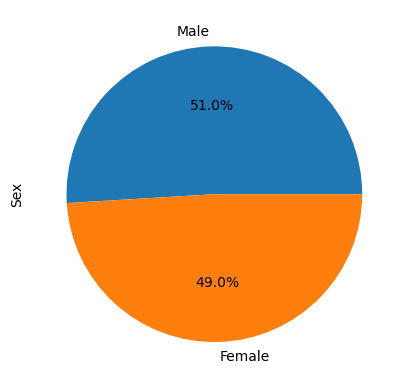

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

mouse_df["Sex"].value_counts().plot.pie(y="Sex",autopct="%1.1f%%")
plt.show()

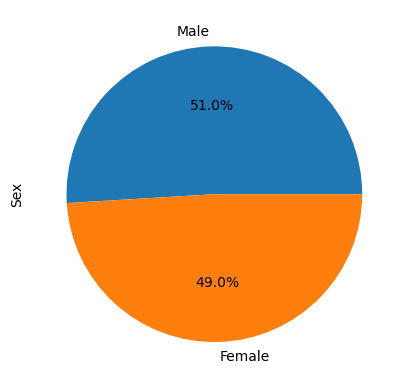

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

Male = mouse_df["Sex"].value_counts()["Male"]
Female = mouse_df["Sex"].value_counts()["Female"]
pies = ["Male","Female"]
pie_percent = [Male,Female]
plt.pie(pie_percent,labels=pies,autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mouse_time_groupby = mouse_df.groupby("Mouse ID")["Timepoint"]
mouse_final_timepoint_df = mouse_time_groupby.last()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_timepoint_df = pd.merge(combined_df,mouse_final_timepoint_df,on=["Mouse ID","Timepoint"]).reset_index()

last_timepoint_df

,index,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,0,f932,0,45.000000,0,Ketapril,Male,15,29
1,1,x336,0,45.000000,0,Naftisol,Female,4,29
2,2,h428,0,45.000000,0,Ketapril,Female,1,27
3,3,v199,0,45.000000,0,Naftisol,Female,17,29
4,4,o848,0,45.000000,0,Stelasyn,Female,14,27
...,...,...,...,...,...,...,...,...,...
243,243,r944,45,41.581521,2,Capomulin,Male,12,25
244,244,u364,45,31.023923,3,Capomulin,Male,18,17
245,245,p438,45,61.433892,1,Ceftamin,Female,11,26
246,246,x773,45,58.634971,4,Placebo,Female,21,30


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
Treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

Tumor_Vol = []

for x in range(len(Treatments)):                                 
    Tumor_Vol.append(last_timepoint_df.loc[last_timepoint_df["Drug Regimen"] == Treatments[x],"Tumor Volume (mm3)"])

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    q = Tumor_Vol[x].quantile([.25,.5,.75])
    lq = q[.25]
    uq = q[.75]
    median = q[.5]
    iqr = uq-lq
    lower_bound = lq - (1.5*iqr)
    upper_bound = uq + (1.5*iqr)
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds

    reduced = last_timepoint_df.loc[last_timepoint_df["Drug Regimen"] == Treatments[x],"Tumor Volume (mm3)"]
    print(f"{Treatments[x]}'s potential outliers: {reduced.loc[(reduced > upper_bound) | (reduced < lower_bound)]}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 20    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


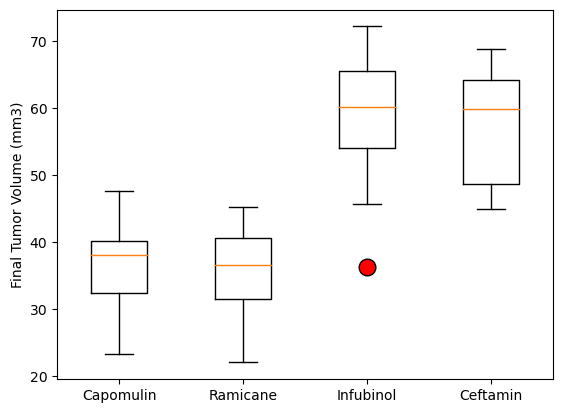

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
a=dict(markerfacecolor='r',markersize=12)
ax1.boxplot(Tumor_Vol,flierprops=a)
ax1.set_xticklabels(Treatments)
ax1.set_ylabel("Final Tumor Volume (mm3)")
plt.show()


## Line and Scatter Plots

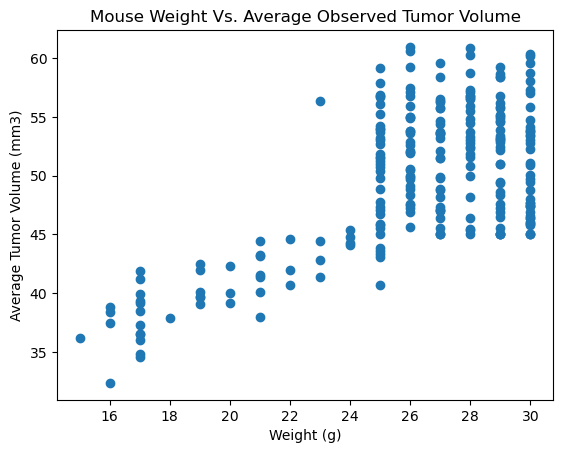

In [16]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

mouse_weights = mouse_df.groupby("Mouse ID")["Weight (g)"].last() 
mouse_tumor = mouse_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()  

plt.scatter(mouse_weights,mouse_tumor)
plt.title("Mouse Weight Vs. Average Observed Tumor Volume")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.66


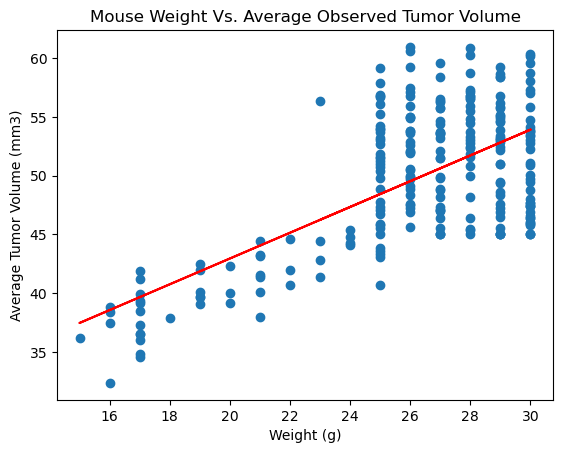

In [17]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

x_values = mouse_weights
y_values = mouse_tumor

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = (slope * x_values) + intercept

print(f"The correlation between mouse weight and the average tumor volume is {rvalue:,.2f}")


plt.scatter(mouse_weights,mouse_tumor)
plt.plot(x_values,regress_values,"r-")
plt.title("Mouse Weight Vs. Average Observed Tumor Volume")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()